이전 모델에서 길이 25cm, 무게 150g 도미를 빙어라고 예측한다.
문제점을 해결해 보자.

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

이전 모델에서는 위 파이썬 리스트를 일일이 순회하면서 원소를 하나씩 꺼내 생선 하나의 길이와 무게를 리스트 안의 리스트로 직접 구성했다. (반복문과 zip()을 사용해 구현함.)

하지만 넘파이를 이용하면 더 쉽게 구현이 가능하다.

In [2]:
import numpy as np

넘파이의 **'column_stack()함수'**는 전달받은 리스트를 일렬로 세운 다음 차례대로 연결한다. 연결할 리스트는 아래와 같이 **튜플로 전달**해야 한다. 또한 열의 개수가 동일하지 않을 경우 에러가 발생한다.

In [3]:
np.column_stack(([1, 2, 3], [4, 5, 6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
# np.column_stack(([1, 2, 3, 4], [4, 5, 6]))

이를 이용해 fish_length와 fish_weight를 합칠 수 있다.

In [5]:
fish_data = np.column_stack((fish_length, fish_weight))

fish_data의 일부를 출력해 보면 잘 구성된 것을 확인할 수 있다.

In [6]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

또한 이전 모델에서는 타깃 데이터를 리스트 [1], [0]을 여러 번 곲해서 타깃 데이터를 만들었다. 하지만 넘파이의 **'np.ones()'와 'np.zeros()'함수**를 이용하면 더 좋다.

이 두 함수는 각각 원하는 개수의 1과 0을 채운 배열을 만들어 준다. 아래와 같이 사용해 주면 된다.

In [7]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


이 두 함수를 이용하여 1이 35개인 배열과 0이 14개인 배열을 간단히 만들 수 있다. 그다음 두 배열을 그대로 연결하면 된다. 여기에서는 **'np.concatenate() 함수'**를 이용한다. np.column_stack()과 마찬가지로 배열을 튜플로 전달해야 한다.

np.column_stack()은 일차원 배열일 때 각각의 열을 행으로 합치지만
np.concatenate()는 그냥 행과 행을 이어준다.

In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


이로써 앞에서 사용한 데이터들과 같은 데이터를 준비했다. 이번에는 파이썬 리스트를 사용해 수동으로 만들지 않고 넘파이 함수를 사용했다.
이 예제는 데이터가 작기 때문에 큰 차이가 없지만 데이터가 큰 경우에 파이썬 리스트로 작업하는 것은 비효율적이다. **넘파이 배열은 핵심 부분이 c, c++과 같은 저수준 언어로 개발되어 빠르고, 데이터 과학 분야에 알맞게 최적화 되어있다.**

이전 모델에서는 넘파이 배열의 인덱스를 직접 섞어서 훈련 세트와 테스트 세트로 나누었다. 이번에는 좀 더 세련된 방법을 써보자.

**사이킷런**은 머신러닝 모델을 위한 알고리즘뿐만 아니라 **다양한 유틸리티 도구도 제공한다.** 데표적인 도구가 **'train_test_split() 함수'**이다. 이함수는 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어 준다.

**train_test_split() 함수는 사이킷런의 model_selection 모듈 아래에 있다.**

In [10]:
from sklearn.model_selection import train_test_split

사용법은 **나누고 싶은 리스트나 배열을 원하는 만큼 전달**하면 된다. 우리는 fish_data와 fish_target만 나누면 되므로 이 둘을 전달하면 된다. 또한 이전에는 np.random.seed() 함수를 통해 시드값을 지정했는데, train_test_split() 함수는 자체적으로 랜덤 시드를 지정할 수 있는 **random_state 매개변수**가 있다.

In [11]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

**fish_data와 fish_target 2개의 배열을 전달했으므로 2개씩 나뉘어 총 4개의 배열이 반환된다.** 따라서 차례대로 처음 2개는 train_input, test_input, 나머지 2개는 train_target, test_target에 들어간다.

이 함수는 **기본적으로 25%를 테스트 세트로 떼어 낸다.** 잘 나누어 졌는지 shape 속성으로 확인해보자.

In [12]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [13]:
print(train_target.shape, test_target.shape)

(36,) (13,)


훈련 데이터와 테스트 데이터를 각각 36개와 13개로 나눈 것을 확인할 수 있다. 입력 데이터는 2개의 열이 있는 2차원 배열이고 타깃 데이터는 1차원 배열이다.

이번에는 도미와 빙어가 잘 섞였는지 테스트 데이터를 출력해보자.

In [14]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


13개의 데이터 세트 중에 10개가 도미고 3개가 빙어이다.
잘 썪인 것 같지만 빙어의 비율이 모자라다. 원래 도미와 빙어의 개수는 35:14로 
2.5:1비율이다. 하지만 이 테스트 세트는 3.3:1 비율이다. 즉, **샘플링 편향이 조금 나타났다.**

이처럼 무작위로 데이터를 나누었을 때 샘플이 골고루 섞이지 않을 수 있다. 특히 일부 클래스의 개수가 적을 때 이런 일이 생길 수 있다. **훈련 세트와 테스트 세트에서 샘플의 클래스 비율이 일정 하지 않다면 모델이 일부 샘플을 올바르게 학습할 수 없을 것이다.**

train_test_split() 함수는 이런 문제를 해결하기 위해 **stratify 매개변수**에 **타깃 데이터를 전달**하면 클래스 비율에 맞게 데이터를 나눈다. 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 유용하다.

In [15]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)

다시 test_target을 출력해보자.

In [16]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


빙어가 하나 늘어 비율이 2.25:1로 2.5:1과 비슷하게 되었다. 이 예제는 데이터가 작아 전체 훈련 데이터의 비율과 동일하게 맞출 수 없지만 꽤 비슷한 비율이다.

이제 데이터가 준비 되었으니 k-최근접 이웃을 훈련해 보자.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

훈련을 완료했고 정확도도 1.0으로 완벽한 모델을 만들었다.
이제 길이가 25cm이고 무게가 150g인 도미를 넣어보자.

In [18]:
kn.predict([[25, 150]])

array([0.])

도미가 아닌 빙어로 예측한다.
눈으로 확인하기 위해 산점도를 그려보자.

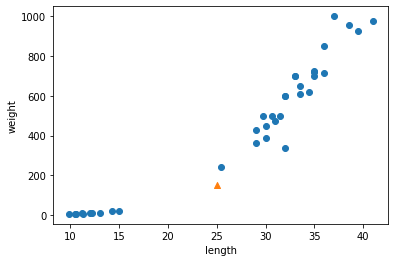

In [19]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^') # marker 매개변수는 모양을 지정한다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

새로운 샘플은 marker매개변수를 '^'로 지정하여 삼각형으로 나타냈다.

이 샘플은 분명히 오른쪽 위로 뻗어 있는 다른 도미 데이터에 더 가깝다. 왜 이 모델은 왼쪽 아래에 낮게 깔린 빙어 데이터에 가깝다고 판단했을까?

k-최근접 이웃은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용한다. KNeighborsClassifier 클래스는 **주어진 샘플에서 가장 가까운 이웃을 찾아 주는 'kneighbors() 메서드'를 제공**한다. 이 메서드는 이웃까지의 **거리**와 이웃 샘플의 **인덱스**를 반환한다. KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본 값은 5이므로 5개의 이웃이 반환된다.

In [20]:
distances, indexes = kn.kneighbors([[25, 150]])

넘파이 배열 인덱싱을 통해 이웃 샘플을 따로 구분해 그려보자.

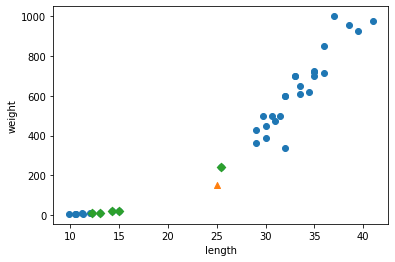

In [21]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

marker = 'D'로 지정하면 산점도를 마름모로 그린다. 

삼각형 샘플에 가장 가까운 5개의 샘플이 초록 다이아 몬드로 표시되었다.
예측 결과와 마찬가지로 가장 가까운 이웃에 도미가 하나 밖에 포함되지 않는다.
직접 데이터를 확인해보자.

In [22]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [23]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [24]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


길이가 25cm, 무게가 150g인 생선에 가장 가까운 이웃에는 빙어가 압도적으로 많다. 산점도를 보면 직관적으로 도미와 가깝게 보이지만 빙어로 예측하게 된다.
하지만 이웃 샘플까지의 거리를 보면 이상한 점을 찾을 수 있다.

산점도를 보자. 삼각형 샘플에 가장 가까운 첫번째 샘플까지의 거리는 92이고, 그외 가장 가까운 샘플들은 모두 130, 138이다. 그런데 거리가 92와 130이라고 했을 때 그래프에 나타난 거리 비율이 이상하다. 어림잡아 봐도 92의 몇배는 되어 보이는데 겨우 거리가 130이다.

이 이유는 x축은 범위가 좁고, y축은 범위가 넓기 때문에 벌어지는 문제이다. 즉, y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산된다. 이 때문에 도미 샘플이 이웃으로 선택되지 못한 것이다.

눈으로 명확히 보기 위해 x축 범위를 동일하게 0 ~ 1,000으로 맞추어보자. x축 범위를 지정하려면 **'xlim() 함수'**, y축 범위를 지정하려면 **'ylim() 함수'**를 사용하면 된다.

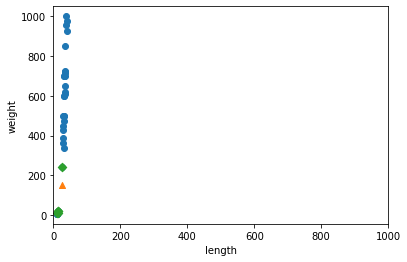

In [25]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

x축 범위를 y축 범위만큼 늘리면 산점도가 거의 일직선으로 나타난다.
즉, 생선의 길이(x축)는 가장 가까운 이웃을 찾는데 크게 영향을 미치지 못하고 오로지 생선의 무게(y축)만 고려 대상이 된다.

이를 보면 두 특성(길이와 무게)의 값이 놓인 범위가 매우 다르다는 것을 알 수 있는데, 이를 **'스케일(scale)'이 다르다**고 말한다.
예를 들어, 정사각형의 세로는 cm, 가로는 inch로 쟀다면 직사각형으로 보이는 것과 같다.

**데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다.** 알고리즘이 거리 기반일 때 특히 그렇다. k-최근접 이웃도 포함되며 이런 알고리즘들은 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면 **특성값을 일정한 기준으로 맞춰줘야 한다.** 이런 작업을 **'데이터 전처리(data preprocessing)'**이라고 부른다.

가장 널리 사용하는 전처리 방법 중 하나는 **'표준 점수(standard score)'(혹은 z 점수라고 부른다)**이다. 표준 점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.

표준점수는 평균을 빼고 표준편차를 나누어 구할 수 있다.

평균은 **'np.mean()' 함수**, 표준편차 **'np.std() 함수'**는 표준편차를 계산하는데 쓸 수 있다.

In [27]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

axis = 0으로 지정하면, 행을 따라 각 열의 통계값을 계산한다.
계산된 평균과 표준편차를 출력해보자.

In [28]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


이제 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 변환하자.

In [29]:
train_scaled = (train_input - mean) / std

넘파이는 train_input의 모든 행에서 mean에 있는 두 평균값을 빼준다. 그 다음 std에 있는 두 표준편차를 다시 모든 행에 적용한다.

이런 넘파이 기능을 **'브로드캐스팅(broadcasting)'**이라고 부른다.

이제 다시 산점도를 그려보자. 이때 [25, 150]인 도미도 표준 점수로 변환해 주어야 한다.

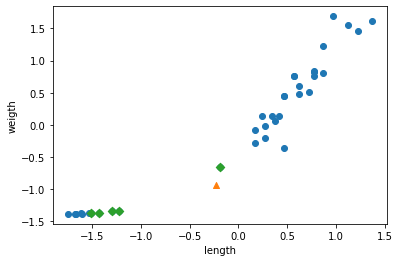

In [31]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

그래프를 보면 앞서 표준편차로 변환하기 전의 산점도와 거의 동일하다.
이제 이 데이터 셋으로 k-최근접 이웃 모델을 다시 훈련해 보자.

In [32]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

훈련을 마치고 테스트 세트로 평가할 때는 주의해야 한다. 훈련 세트의 평균과 표준편차로 변환해야지 올바른 결과가 나온다.

In [33]:
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [35]:
print(kn.predict([new]))

[1.]


이로써 완벽한 모델을 완성했다.
마지막으로 kneighbors()함수로 이 샘플의 k-최근접 이웃을 구한 다음 산점도로 그려보자.

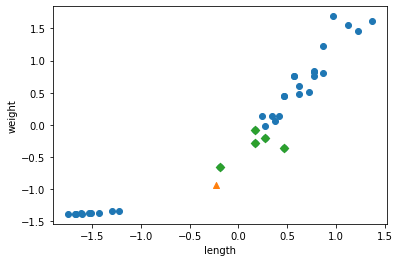

In [36]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 정리

핵심 포인트
* 데이터 전처리: **머신러닝 모델에 훈련 데이터를 주입하기 전에 가공하는 단계**를 말한다. 때로는 데이터 전처리에 많은 시간이 소모된다.
* 표준점수: **훈련 세트의 스케일을 바꾸는 대표적인 방법**이다. 표준점수를 얻으려면 특성의 평균을 빼고 표준편차로 나누면 된다. 테스트 세트는 훈련 세트의 평균과 표준편차로 바꿔야한다.
* 브로드캐스팅: **크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능**이다.

핵심 패키지와 함수

scikit-learn
* train_test_split(): **훈련 데이터를 훈련 세트와 테스트 세트로 나누는 함수**이다. 여러 개의 배열을 전달할 수 있다. 데스트 세트로 나눌 비율은 test_size 매개변수에서 지정할 수 있으며 **기본값은 25%**이다. **shuffle 매개변수**로 무작위로 섞을지 여부를 결정할 수 있으며 기본값은 True이다.  **stratify 매개변수**로 클래스 비율에 맞게 훈련 세트와 테스트 세트를 나눌 수 있다.
* kneighbors(): k-최근접 이웃 객체의 메서드이다. **입력한 데이터에 가장 가까운 이웃을 찾아 거리와 이웃 샘플의 인덱스를 반환한다.** 기본적으로 이웃의 개수는 KNeighborsClassifier 클래스의 객체를 생성할 때 지정한 개수를 사용한다. 하지만 n_neighbors 매개변수에서 다르게 지정할 수 있다. return_distance 매개변수를 False로 지정하면 인덱스만 반환한다.